In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader import data
import datetime as dt

from cycler import cycler
from random import randint
import matplotlib as mpl

In [2]:
plt.style.use('ggplot')
mpl.rc('lines', linewidth=3)
mpl.rc('legend', fontsize=18)  # using a size in points

params = {'xtick.labelsize': 19,
          'ytick.labelsize': 19,
          'axes.labelsize': 'x-large'}
plt.rcParams.update(params)

In [3]:
def read_data(data):
    df = pd.read_csv(data)
    df.publisher = [i.split("'")[1] if len(i)>2 else '' for i in df.publisher.fillna('')]
    df.releasedate = pd.to_datetime(df.releasedate)
    return df

In [7]:
def plot_data(ticker, publisher, start, end, thresh, figsize):

    # User pandas_reader.data.DataReader to load the desired data. As simple as that.
    panel_data = data.DataReader(ticker, 'yahoo', start, end)

    # get games above threshold
    good_games = df[(df['publisher'] == publisher) & (df.metacritic >= thresh)][['releasedate', 'name']]
    good_games.reset_index(inplace=True)

    # define colors
    color = []
    for i in range(len(good_games)):
        color.append('#%06X' % randint(0, 0xFFFFFF))


    fig = plt.figure(figsize=figsize)
    plt.style.use('ggplot')
    ax = plt.gca()


    sns.lineplot(data=panel_data.reset_index(), x='Date', y='Close', label='Stock Price', linewidth=2, color='black', ls='-')
    for i in good_games.iterrows():
        plt.axvline(i[1][1], label=i[1][2], lw=4, color=color[i[0]], ls='--')
    plt.legend(bbox_to_anchor=(1.05, 1))


    plt.ylabel('Price', size=20)
    plt.xlabel('Date', labelpad=0, size=20)

    ax.tick_params(direction='out', length=6, width=2, which='major')
    ax.tick_params(direction='out', length=4, width=2, which='minor')
    plt.show()

In [5]:
df = read_data('metacritic_game_data_test.csv')

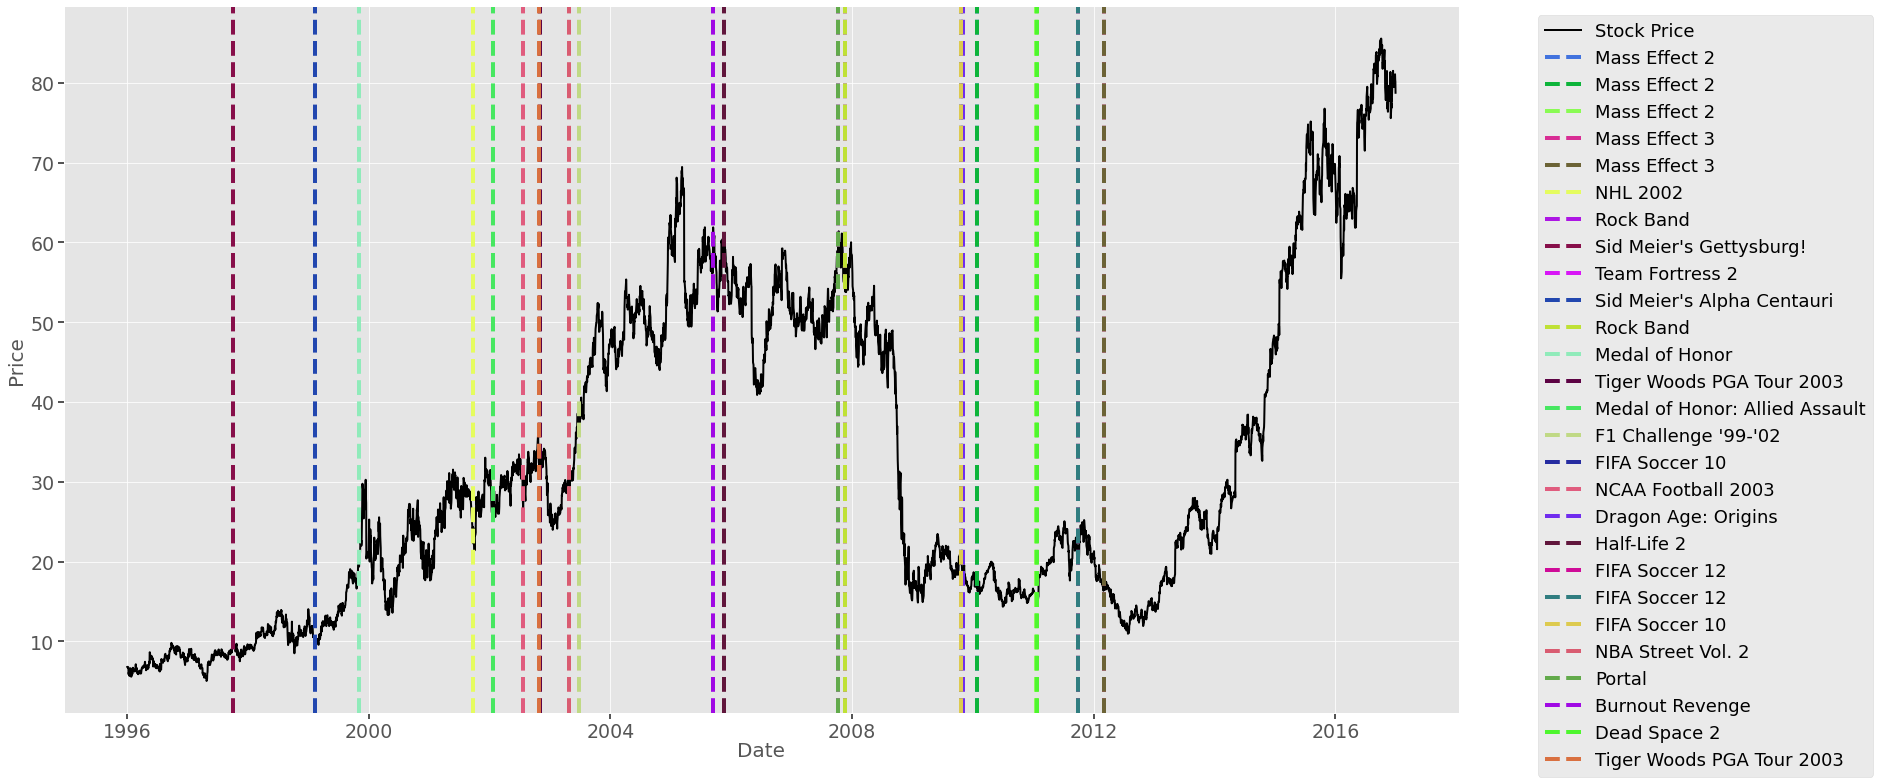

In [8]:
params = {'start':'1996-01-01',
         'end':'2016-12-31',
         'publisher':'Electronic Arts',
          'ticker':'EA',
         'thresh':90,
         'figsize':(25,13)}

plot_data(**params)